In [1]:
import numpy as np
from function import loadData, preprocessing, removenans
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/output_fields_smooth.npz')
data_list = loadData(data)

## Data Preprocessing

In [3]:
new_data,data_noNan,nan_list = removenans(data)
data_preprocessing = preprocessing(data_noNan)

## HDBSCAN

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples = 35, gen_min_span_tree=True)
clusterer.fit(data_preprocessing[:,:-2])

HDBSCAN(gen_min_span_tree=True, min_cluster_size=20, min_samples=35)

## Build the minimum spanning tree

### plotting minimum spanning tree for mutual reachability distance

<AxesSubplot:>

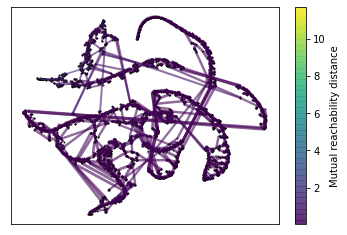

In [5]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=1,
                                      edge_linewidth=0.5)

## Condense the cluster tree

### plotting clusters

<AxesSubplot:ylabel='$\\lambda$ value'>

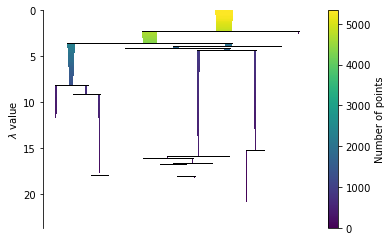

In [6]:
clusterer.condensed_tree_.plot()

## Extract the clusters

### choosing clusters that persist and have a longer lifetime

<AxesSubplot:ylabel='$\\lambda$ value'>

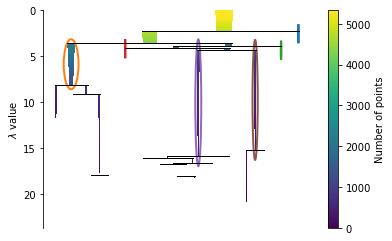

In [7]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())